In [1]:
import pandas as pd

# Load and display the original normalized features file
original_file = pd.read_csv('extracted_features_reduced.csv')
print("\nOriginal Normalized Features (first few rows):")
print(original_file.head())


Original Normalized Features (first few rows):
        song_id  num_columns  mfcc_1_min  mfcc_1_max  mfcc_1_mean  \
0   70-MFCC.csv        26979  -609.03960  -73.390305  -264.318414   
1  104-MFCC.csv        34193  -507.75558   -2.346409  -179.180796   
2   67-MFCC.csv         9341  -594.88116 -142.483080  -301.255447   
3  110-MFCC.csv        24413  -604.53700  -47.797054  -216.665971   
4   92-MFCC.csv        22757  -560.72473  -70.374140  -203.180603   

   mfcc_1_median  mfcc_1_std  mfcc_1_variance  mfcc_1_skew  mfcc_1_kurtosis  \
0     -255.84961   80.625633      6500.492697    -1.430020         4.126565   
1     -177.26149   63.096498      3981.168110    -1.961053         9.269314   
2     -295.13766   65.813001      4331.351080    -0.958775         2.539263   
3     -194.19955   91.176897      8313.226535    -1.871377         4.741894   
4     -188.89359   69.878202      4882.963167    -2.759736        10.405252   

   ...  spectral_flatness_mean  spectral_flatness_std  spectra

In [4]:
import pandas as pd
from sklearn.feature_selection import VarianceThreshold

# Load your original file (replace 'your_file.csv' with the actual file name)
file_path = 'extracted_features_reduced.csv'  # Update this with your file path
data_df = pd.read_csv(file_path)

# Separate the song_id column if it exists
song_id = data_df['song_id']
feature_data = data_df.drop(columns=['song_id'])

# Set the variance threshold (adjust threshold value as needed)
threshold_value = 0.1
var_thresh = VarianceThreshold(threshold=threshold_value)

# Apply variance thresholding
filtered_features = var_thresh.fit_transform(feature_data)

# Get the selected feature names
selected_feature_names = feature_data.columns[var_thresh.get_support()]

# Create a new DataFrame with the filtered features
filtered_df = pd.DataFrame(filtered_features, columns=selected_feature_names)

# Add back the song_id column if needed
filtered_df.insert(0, 'song_id', song_id)

# Display the resulting DataFrame
print("Filtered DataFrame with variance threshold applied:")
print(filtered_df.head())

# Save the result to a new CSV file if needed
filtered_df.to_csv('filtered_reduced.csv', index=False)


Filtered DataFrame with variance threshold applied:
        song_id  num_columns  mfcc_1_min  mfcc_1_max  mfcc_1_mean  \
0   70-MFCC.csv      26979.0  -609.03960  -73.390305  -264.318414   
1  104-MFCC.csv      34193.0  -507.75558   -2.346409  -179.180796   
2   67-MFCC.csv       9341.0  -594.88116 -142.483080  -301.255447   
3  110-MFCC.csv      24413.0  -604.53700  -47.797054  -216.665971   
4   92-MFCC.csv      22757.0  -560.72473  -70.374140  -203.180603   

   mfcc_1_median  mfcc_1_std  mfcc_1_variance  mfcc_1_skew  mfcc_1_kurtosis  \
0     -255.84961   80.625633      6500.492697    -1.430020         4.126565   
1     -177.26149   63.096498      3981.168110    -1.961053         9.269314   
2     -295.13766   65.813001      4331.351080    -0.958775         2.539263   
3     -194.19955   91.176897      8313.226535    -1.871377         4.741894   
4     -188.89359   69.878202      4882.963167    -2.759736        10.405252   

   ...  spectral_rolloff_mean  spectral_rolloff_std  spect

In [5]:
import pandas as pd
import numpy as np

# Load the filtered features file
file_path = 'filtered_reduced.csv'  # Replace with the actual path of your filtered file
filtered_df = pd.read_csv(file_path)

# Select only numeric columns for correlation analysis
numeric_df = filtered_df.select_dtypes(include=[np.number])

# Calculate the correlation matrix for numeric features
correlation_matrix = numeric_df.corr().abs()

# Set the threshold for high correlation
threshold = 0.80

# Identify pairs of highly correlated features (threshold > 0.95)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# List of features to drop
highly_correlated_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]

# Drop the highly correlated features
reduced_df = filtered_df.drop(columns=highly_correlated_features)

# Save the reduced DataFrame to a new CSV file
reduced_df.to_csv('filtered_reduced2.csv', index=False)

# Display the first few rows of the reduced DataFrame
print("Reduced DataFrame:")
print(reduced_df.head())

# Print the dropped features
print(f"Dropped features: {highly_correlated_features}")


Reduced DataFrame:
        song_id  num_columns  mfcc_1_min  mfcc_1_max  mfcc_1_std  mfcc_1_skew  \
0   70-MFCC.csv      26979.0  -609.03960  -73.390305   80.625633    -1.430020   
1  104-MFCC.csv      34193.0  -507.75558   -2.346409   63.096498    -1.961053   
2   67-MFCC.csv       9341.0  -594.88116 -142.483080   65.813001    -0.958775   
3  110-MFCC.csv      24413.0  -604.53700  -47.797054   91.176897    -1.871377   
4   92-MFCC.csv      22757.0  -560.72473  -70.374140   69.878202    -2.759736   

   mfcc_2_min  mfcc_2_max  mfcc_2_std  mfcc_2_skew  ...  \
0         0.0   223.88953   30.733178    -1.218551  ...   
1         0.0   206.41900   31.398634    -1.517723  ...   
2         0.0   247.00610   34.255390    -1.848398  ...   
3         0.0   257.14000   36.254801    -1.361137  ...   
4         0.0   214.04141   28.291418    -2.168342  ...   

   delta2_mfcc_16_kurtosis  delta2_mfcc_17_min  global_mfcc_skewness  \
0                 0.753374           -5.312412             -2.77336

In [6]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load the reduced features file
reduced_file_path = 'filtered_reduced2.csv'  # Replace with the path to your reduced file
reduced_df = pd.read_csv(reduced_file_path)

# Initialize the scaler
scaler = StandardScaler()

# Select only numeric columns for normalization
numeric_columns = reduced_df.select_dtypes(include=[np.number]).columns

# Apply Z-score normalization to numeric columns
reduced_df[numeric_columns] = scaler.fit_transform(reduced_df[numeric_columns])

# Save the normalized DataFrame to a new CSV file
reduced_df.to_csv('normalized_filtered_reduced.csv', index=False)

# Display the first few rows of the normalized DataFrame
print("Normalized Reduced DataFrame:")
print(reduced_df.head())


Normalized Reduced DataFrame:
        song_id  num_columns  mfcc_1_min  mfcc_1_max  mfcc_1_std  mfcc_1_skew  \
0   70-MFCC.csv     0.783319   -1.258011    0.038846    0.828885     0.457833   
1  104-MFCC.csv     1.956643    1.529150    1.313896   -0.276865    -0.352197   
2   67-MFCC.csv    -2.085420   -0.868396   -1.201187   -0.105506     1.176664   
3  110-MFCC.csv     0.365971   -1.134108    0.498177    1.494466    -0.215406   
4   92-MFCC.csv     0.096631    0.071530    0.092978    0.150929    -1.570497   

   mfcc_2_min  mfcc_2_max  mfcc_2_std  mfcc_2_skew  ...  \
0    0.074045   -0.199412    0.188427     0.445680  ...   
1    0.074045   -0.932738    0.305016     0.026293  ...   
2    0.074045    0.770907    0.805524    -0.437258  ...   
3    0.074045    1.196278    1.155824     0.245800  ...   
4    0.074045   -0.612787   -0.239373    -0.885764  ...   

   delta2_mfcc_16_kurtosis  delta2_mfcc_17_min  global_mfcc_skewness  \
0                 0.292911           -1.874628          

In [7]:
import pandas as pd
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Load the standardized data
standardized_file_path = 'normalized_filtered_reduced.csv'  # Replace with your actual file path
standardized_df = pd.read_csv(standardized_file_path)

# Select only numeric columns for SVD
numeric_df = standardized_df.select_dtypes(include=[np.number])

# Check the number of features
num_features = numeric_df.shape[1]
print(f"Number of features: {num_features}")

# Perform SVD with the desired number of components
n_components = min(150, num_features)  # Use the minimum of 150 or the number of features
svd = TruncatedSVD(n_components=n_components, random_state=42)
reduced_features = svd.fit_transform(numeric_df)

# Check the shape of reduced_features
print(f"Shape of reduced features: {reduced_features.shape}")

# Convert the reduced features into a DataFrame
reduced_features_df = pd.DataFrame(reduced_features, columns=[f'SVD_{i+1}' for i in range(reduced_features.shape[1])])

# Save the reduced features to a new CSV file
reduced_features_df.to_csv('normalized_filtered_reduced2.csv', index=False)

# Display the first few rows of the reduced DataFrame (optional)
print(reduced_features_df.head())


Number of features: 182
Shape of reduced features: (84, 84)
       SVD_1     SVD_2     SVD_3     SVD_4     SVD_5     SVD_6     SVD_7  \
0  -4.860545 -1.384848  3.448469 -1.209332 -0.209466  2.119445  1.610994   
1  -4.643710 -3.992754 -0.630772 -2.423413  1.293772 -1.661527 -0.539397   
2  11.366049  4.671011  0.676162 -1.116172 -6.000193 -4.328703 -0.525297   
3  -1.205143  8.659148  3.421261  3.948794  7.167202 -0.194344 -0.655059   
4   3.476729 -2.411252  0.922369 -1.068977 -1.295783 -0.991371  0.676516   

      SVD_8     SVD_9    SVD_10  ...    SVD_75    SVD_76    SVD_77    SVD_78  \
0 -2.523902  0.710132  1.797911  ...  0.771899 -0.240643  0.823905  0.259505   
1  2.543295  1.367121  2.040328  ... -0.142157  0.004778  0.246197  0.269358   
2 -2.623655 -2.690124  2.369285  ... -0.336350 -0.343716 -0.284431 -0.291324   
3  2.152518 -1.327418 -2.026762  ... -0.166248 -0.343018  0.206357 -0.067523   
4 -1.594997 -2.251850  0.526092  ...  0.156603 -0.430250 -0.117839 -0.295235   

  

In [8]:
import pandas as pd
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Load the normalized reduced features file
normalized_reduced_file_path = 'normalized_filtered_reduced2.csv'  # Replace with your actual path
normalized_reduced_df = pd.read_csv(normalized_reduced_file_path)

# Select only numeric columns for VIF calculation
numeric_df = normalized_reduced_df.select_dtypes(include=[float, int])

# Calculate VIF for each feature
vif_data = pd.DataFrame()
vif_data['Feature'] = numeric_df.columns
vif_data['VIF'] = [variance_inflation_factor(numeric_df.values, i) for i in range(numeric_df.shape[1])]

# Display VIF values
print("VIF values for each feature:")
print(vif_data)

VIF values for each feature:
   Feature       VIF
0    SVD_1  1.000000
1    SVD_2  1.000000
2    SVD_3  1.000000
3    SVD_4  1.000000
4    SVD_5  1.000000
..     ...       ...
79  SVD_80  1.000000
80  SVD_81  1.000000
81  SVD_82  1.000000
82  SVD_83  1.000000
83  SVD_84  1.019611

[84 rows x 2 columns]


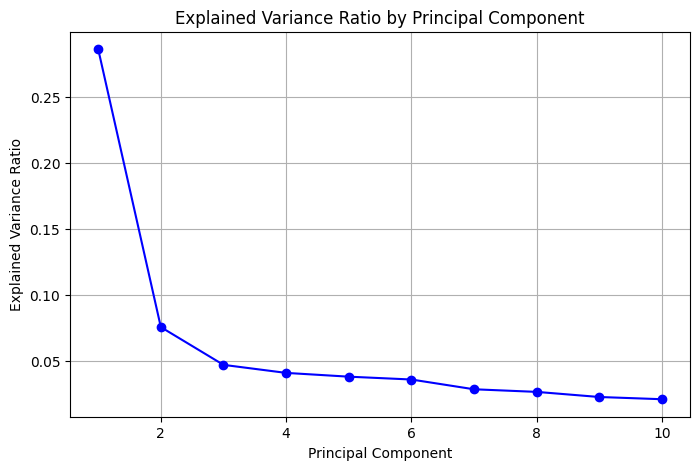

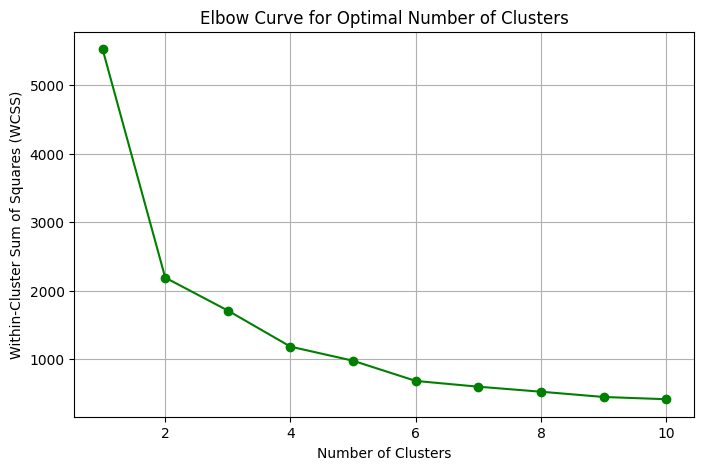

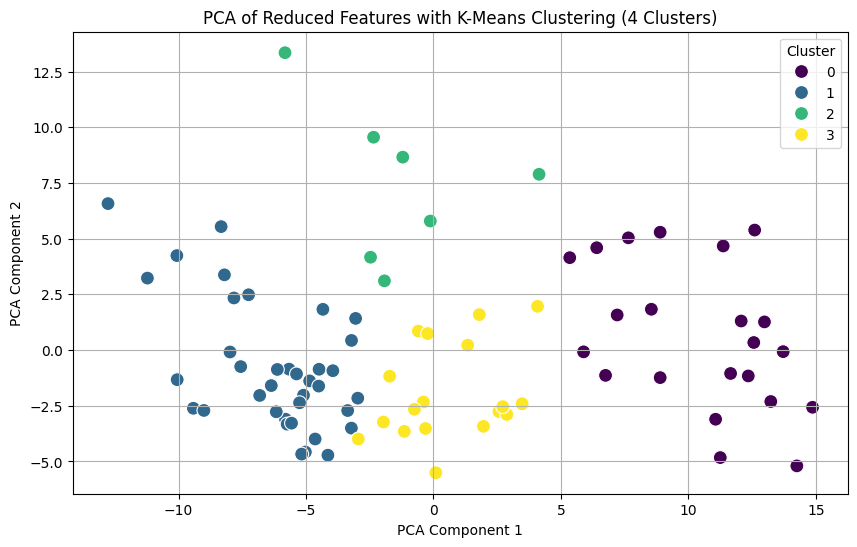

In [10]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the reduced features from the SVD output
reduced_file_path = 'normalized_filtered_reduced2.csv'  # Path to your SVD output file
reduced_features_df = pd.read_csv(reduced_file_path)

# Perform PCA on the reduced features
max_components = min(10, reduced_features_df.shape[1])  # Set a maximum number of components for visualization
pca = PCA(n_components=max_components)
pca.fit(reduced_features_df)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio for each component (Elbow for PCA)
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), explained_variance_ratio, marker='o', color='b')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Reduce to the desired number of components for visualization (e.g., 2 components for PCA scatter plot)
n_components_pca = 2
pca = PCA(n_components=n_components_pca)
pca_features = pca.fit_transform(reduced_features_df)

# Convert PCA features into a DataFrame
pca_features_df = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(n_components_pca)])

# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10  # Set the maximum number of clusters for the elbow curve
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_features_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve for clustering
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', color='g')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Apply K-Means clustering with the chosen number of clusters (e.g., 6 clusters)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pca_features_df['Cluster'] = kmeans.fit_predict(pca_features_df)

# Visualize the PCA results with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_features_df, x='PCA_1', y='PCA_2', hue='Cluster', palette='viridis', s=100)
plt.title(f'PCA of Reduced Features with K-Means Clustering ({n_clusters} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Optionally, save the PCA features with clusters to a new file
pca_features_df.to_csv('pca_filtered_reduced.csv', index=False)


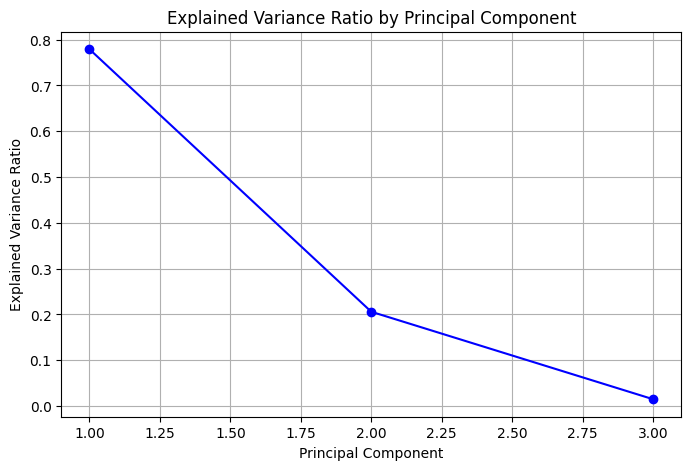

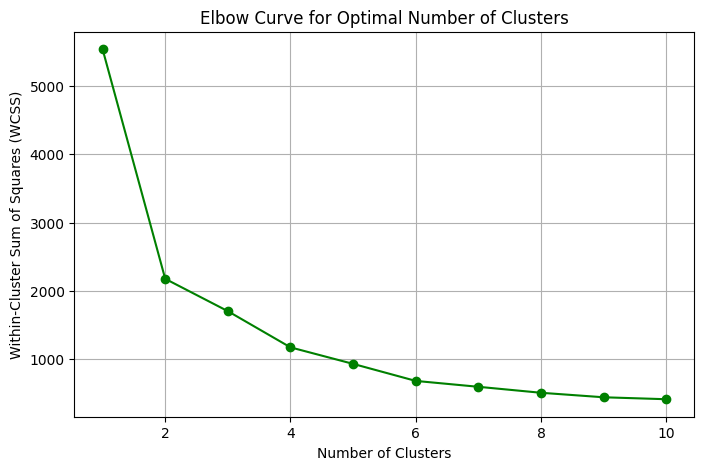

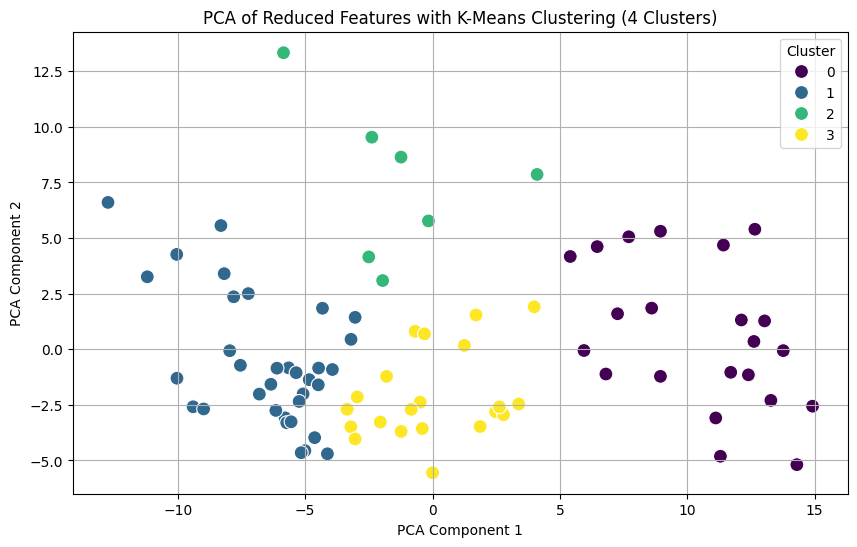

In [12]:
import pandas as pd
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt
import seaborn as sns

# Load the reduced features from the SVD output
reduced_file_path = 'pca_filtered_reduced.csv'  # Path to your SVD output file
reduced_features_df = pd.read_csv(reduced_file_path)

# Perform PCA on the reduced features
max_components = min(10, reduced_features_df.shape[1])  # Set a maximum number of components for visualization
pca = PCA(n_components=max_components)
pca.fit(reduced_features_df)
explained_variance_ratio = pca.explained_variance_ratio_

# Plot the explained variance ratio for each component (Elbow for PCA)
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_components + 1), explained_variance_ratio, marker='o', color='b')
plt.title('Explained Variance Ratio by Principal Component')
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.grid(True)
plt.show()

# Reduce to the desired number of components for visualization (e.g., 2 components for PCA scatter plot)
n_components_pca = 2
pca = PCA(n_components=n_components_pca)
pca_features = pca.fit_transform(reduced_features_df)

# Convert PCA features into a DataFrame
pca_features_df = pd.DataFrame(pca_features, columns=[f'PCA_{i+1}' for i in range(n_components_pca)])

# Determine the optimal number of clusters using the elbow method
wcss = []
max_clusters = 10  # Set the maximum number of clusters for the elbow curve
for i in range(1, max_clusters + 1):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(pca_features_df)
    wcss.append(kmeans.inertia_)

# Plot the elbow curve for clustering
plt.figure(figsize=(8, 5))
plt.plot(range(1, max_clusters + 1), wcss, marker='o', color='g')
plt.title('Elbow Curve for Optimal Number of Clusters')
plt.xlabel('Number of Clusters')
plt.ylabel('Within-Cluster Sum of Squares (WCSS)')
plt.grid(True)
plt.show()

# Apply K-Means clustering with the chosen number of clusters (e.g., 6 clusters)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
pca_features_df['Cluster'] = kmeans.fit_predict(pca_features_df)

# Visualize the PCA results with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=pca_features_df, x='PCA_1', y='PCA_2', hue='Cluster', palette='viridis', s=100)
plt.title(f'PCA of Reduced Features with K-Means Clustering ({n_clusters} Clusters)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend(title='Cluster')
plt.grid(True)
plt.show()

# Optionally, save the PCA features with clusters to a new file
pca_features_df.to_csv('pca_filtered_reduced2.csv', index=False)


Silhouette Score for existing 6 K-Means clusters: 0.4419495761394501
Davies-Bouldin Index for existing 6 K-Means clusters: 0.8154454065866006

Cluster Counts:
Cluster 0: 23 points
Cluster 1: 23 points
Cluster 2: 20 points
Cluster 3: 18 points


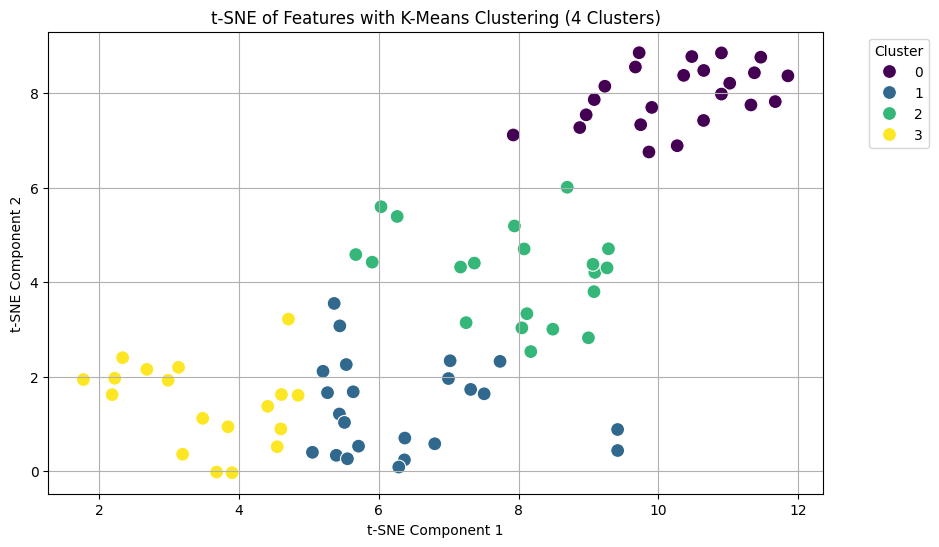

In [2]:
import pandas as pd
from sklearn.manifold import TSNE
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score, davies_bouldin_score
import matplotlib.pyplot as plt
import seaborn as sns

# Load the reduced features from the SVD output
file_path = 'pca_filtered_reduced2.csv'  # Path to your file with features
features_df = pd.read_csv(file_path)

# Perform t-SNE on the features
n_components_tsne = 2  # Set to 2 for visualization purposes
tsne = TSNE(n_components=n_components_tsne, random_state=42)
tsne_features = tsne.fit_transform(features_df)

# Convert t-SNE features into a DataFrame
tsne_features_df = pd.DataFrame(tsne_features, columns=[f'tSNE_{i+1}' for i in range(n_components_tsne)])

# Apply K-Means clustering with 6 clusters (assuming it is already optimal)
n_clusters = 4
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
tsne_features_df['Cluster'] = kmeans.fit_predict(tsne_features_df)

# Calculate silhouette score and Davies-Bouldin index for the 6 clusters
silhouette_kmeans = silhouette_score(tsne_features_df[[f'tSNE_{i+1}' for i in range(n_components_tsne)]], tsne_features_df['Cluster'])
davies_bouldin_kmeans = davies_bouldin_score(tsne_features_df[[f'tSNE_{i+1}' for i in range(n_components_tsne)]], tsne_features_df['Cluster'])

print(f'Silhouette Score for existing 6 K-Means clusters: {silhouette_kmeans}')
print(f'Davies-Bouldin Index for existing 6 K-Means clusters: {davies_bouldin_kmeans}')

# Print cluster counts (number of points in each cluster)
cluster_counts = tsne_features_df['Cluster'].value_counts().sort_index()
print("\nCluster Counts:")
for cluster_num, count in cluster_counts.items():
    print(f"Cluster {cluster_num}: {count} points")

# Visualize the t-SNE plot with clusters
plt.figure(figsize=(10, 6))
sns.scatterplot(data=tsne_features_df, x='tSNE_1', y='tSNE_2', hue='Cluster', palette='viridis', s=100)
plt.title(f't-SNE of Features with K-Means Clustering ({n_clusters} Clusters)')
plt.xlabel('t-SNE Component 1')
plt.ylabel('t-SNE Component 2')
plt.legend(title='Cluster', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.show()

# Optionally, save the t-SNE features with clusters to a new file
tsne_features_df.to_csv('tsne_clustered_features_reduced.csv', index=False)
